<a href="https://colab.research.google.com/github/Adeelzafar/Visual-Recognition-/blob/main/UHAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setup Kaggle DIR; copy json file ; chmod
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
#Install kaggle packages
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 5.3MB 24.6MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 112kB 59.4MB/s 
     |████████████████████████████████| 112kB 69.0MB/s 


In [ ]:
#!kaggle datasets list
!kaggle datasets list -s hazrat/uhat-urdu-handwritten-text-dataset

ref                                        title                                size  lastUpdated          downloadCount  
-----------------------------------------  -----------------------------------  ----  -------------------  -------------  
hazrat/uhat-urdu-handwritten-text-dataset  UHaT: Urdu handwritten text dataset  43MB  2020-02-17 08:11:52             59  


In [ ]:
!kaggle datasets download -d hazrat/uhat-urdu-handwritten-text-dataset


 85% 37.0M/43.4M [00:00<00:00, 62.6MB/s]
100% 43.4M/43.4M [00:00<00:00, 80.5MB/s]


In [ ]:
%%capture
!unzip uhat-urdu-handwritten-text-dataset.zip

In [ ]:
#!wget https://www.kaggleusercontent.com/kf/33003468/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..QAz3vLDP_7Tr34QZ7cMiVQ.8qNtUmzHui3eRNWD6Nb4DgVcTmVKy2Qjsj69BCO3CoOdY6bYQK9z6FeIKjvVU4KJrZJuJWMp2ydMTiFMuRon2we3AjjnzxZ6ddjl94Td1eXFUf6MbJlH2kS_q1wqrJAIDv6RIy5rxD8G5BKOJ7DA0IYIfTZz0GvJo_X7C9Cc0KZ4Dq38JxuAeS-_yrD7BNqBdRB9ehyN2a0-8X9XcZLnWTZMWxa4iGsFZ7A5jq7Wv1FCLbNTPU2mWHl1Mpv6GpdH2pfVW4JUkKcBfRAqdov5w_7UjQXzGH3hPF3IIZgBWLVNzUs26ExeQykjS0TW340wWydzksb6Tbvej5kMHLbCgfgPu0yOCByDd8ZS6oIJWT0bpopGOK3qO0fsn2AYfC7wIEVONfGCF_Zt28WYdfuH8tYoGsHpbUikiliGFnGb1_SQgUVvnogv9mO89nW4MZ2-89V2uRkv2ePCmpY8bvuC8iBYfOkWt5Bbt7arep3iLnDf3C2Eq6AlRkeZQHpf5d0mS8oY944f7In2R76PsAE7_68MMZLZ_PFEQ-Nj3BvohQFOrdEGgK-R8fDfby3wEMcn56eqFstg8UEOHEgGkZNBN_qT1pP_SdpXDWGWL5WGyhK__IRrYAtwc80gBtoVWNqTwU4dk6HBfKA_Nb20DVvCT6XihXKddhT3g58muZdvPNlPX0GVg5q5AtOGFwwvt_Y9.e7eA3tDHRhzSkYIxcyFrjA/mnist.h5

In [ ]:
%%capture
#!pip install image-classifiers==1.0.0b1

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

In [ ]:
path='/content/data/data/'

In [ ]:
img=cv2.imread(path+'characters_train_set/sheen/sheen (479).jpg')
img.shape

(28, 28, 3)

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    validation_split=0.3)

In [ ]:
img_shape=28
batch_size=64

In [ ]:
train_generator = data_gen.flow_from_directory(
    path+'characters_train_set/',
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    color_mode="grayscale",
    shuffle=True)

Found 19847 images belonging to 40 classes.


In [ ]:
val_suffle=False
val_generator = data_gen.flow_from_directory(
    path+'characters_train_set',
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="grayscale",
    subset='validation',shuffle=val_suffle)#shuffle should be False in validation
    #https://stackoverflow.com/a/47439789/11170350

Found 8481 images belonging to 40 classes.


In [ ]:
test_suffle=False
test_generator = data_gen.flow_from_directory(
    path+'characters_test_set/',
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="grayscale",
    shuffle=False)#shuffle should be False in validation
    #https://stackoverflow.com/a/47439789/11170350

Found 4880 images belonging to 40 classes.


In [ ]:
train_generator.next()[0].shape,train_generator.next()[1].shape


((64, 28, 28, 1), (64, 40))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense,BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(BatchNormalization(axis=1))
model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(40, activation='softmax'))

In [ ]:
#model.load_weights('mnist.h5')

In [ ]:
def custom_loss(y_true, y_pred):
    return categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint   
from tensorflow.keras.callbacks import ReduceLROnPlateau



Using TensorFlow backend.


In [ ]:
num_epochs=25

In [ ]:
histoy = model.fit(train_generator,epochs=num_epochs,verbose=1,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=test_generator,
                             validation_steps=test_generator.n/batch_size,
                              callbacks=[
                                  ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2, min_lr=0.000001)
                              ]
                    )

Epoch 1/25
311/310 [==============================] - 16s 53ms/step - loss: 2.9088 - accuracy: 0.1782 - val_loss: 6.9600 - val_accuracy: 0.0412 - lr: 0.0010
Epoch 2/25
311/310 [==============================] - 16s 52ms/step - loss: 1.8213 - accuracy: 0.4549 - val_loss: 8.3702 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 3/25
311/310 [==============================] - 16s 52ms/step - loss: 1.1668 - accuracy: 0.6441 - val_loss: 10.5342 - val_accuracy: 0.1170 - lr: 0.0010
Epoch 4/25
311/310 [==============================] - 16s 52ms/step - loss: 0.8418 - accuracy: 0.7433 - val_loss: 12.0001 - val_accuracy: 0.1227 - lr: 3.0000e-04
Epoch 5/25
311/310 [==============================] - 16s 52ms/step - loss: 0.7545 - accuracy: 0.7731 - val_loss: 12.2731 - val_accuracy: 0.1197 - lr: 3.0000e-04
Epoch 6/25
311/310 [==============================] - 16s 52ms/step - loss: 0.6808 - accuracy: 0.7970 - val_loss: 12.6877 - val_accuracy: 0.1223 - lr: 9.0000e-05
Epoch 7/25
311/310 [======================

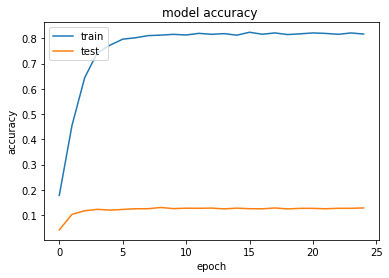

In [ ]:

plt.plot(histoy.history['accuracy'])
plt.plot(histoy.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

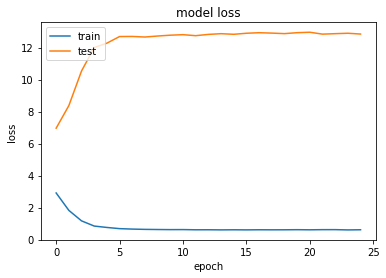

In [ ]:
plt.plot(histoy.history['loss'])
plt.plot(histoy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
val_generator.reset()
y_pred=model.predict(val_generator,steps=val_generator.n/batch_size,verbose=1)

133/132 [==============================] - 5s 39ms/step


In [ ]:
y_true = val_generator.classes

In [ ]:
y_pred.shape,y_true.shape

((8481, 40), (8481,))

In [ ]:
y_pred=np.argmax(y_pred, axis=1)


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_true,y_pred))
print(f1_score(y_true,y_pred,average='macro'))

0.8034429902134183
0.8029529347380467


In [ ]:
class_label=list(train_generator.class_indices.keys())

print(classification_report(y_true, y_pred,target_names=class_label))#


              precision    recall  f1-score   support

        alif       0.87      0.93      0.90       209
 alif mad aa       0.78      0.94      0.85       224
         ayn       0.76      0.69      0.72       243
         baa       0.90      0.92      0.91       157
    bari yaa       0.96      0.94      0.95       248
       cheey       0.91      0.90      0.90       219
   choti yaa       0.74      0.76      0.75       245
        daal       0.77      0.81      0.79       192
       dhaal       0.77      0.73      0.75       186
         faa       0.85      0.84      0.84       229
        gaaf       0.80      0.75      0.78       214
       ghain       0.78      0.66      0.72       222
        haa1       0.77      0.82      0.80       246
        haa2       0.92      0.87      0.89       237
        haa3       0.87      0.81      0.84       224
       hamza       0.79      0.90      0.84       247
        jeem       0.93      0.89      0.91       206
        kaaf       0.64    